<a href="https://colab.research.google.com/github/liscolme/EscapeEarth/blob/main/Interns/Elise/BLS_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mount google drive to access files

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
#standard imports
%matplotlib inline
!pip install lightkurve==1.9.0 #b/c non-standard library
import lightkurve as lk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## import our custom modules

import sys
sys.path.append('/content/gdrive/My Drive/EscapeEarthData/')
import OpenAndPlot as op

In [ ]:
import LCAnalysis_test as lca

In [ ]:
ticid = 26489741
sector = 15
target = [ticid, sector]

star_1 = op.OpenAndPlot(target)
lc = star_1.open_lc('clean')
lc

TessLightCurve(TICID: None)

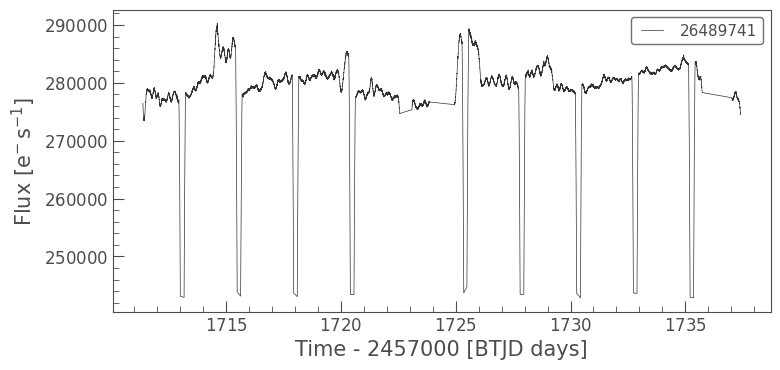

In [ ]:
folded = lc.fold(period=2.465579)

%matplotlib inline
lc.plot()

In [ ]:
stats_sec14 = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/BLS_results/bls_statsdf_sec14.csv')

#drop index column
stats_sec14 = stats_sec14.drop(columns=['Unnamed: 0'])

# make an array of sector values that is the same length as the df we'll add to 
col_for_14_1 = np.repeat(14, len(stats_sec14))
# now add that array to df_1
stats_sec14['Sector'] = col_for_14_1
# see the changes
stats_sec14

TIC    Period  Duration  Transit Time  Power     Depth  Sector
0         7582633  0.299916     0.298         0.157      0  0.000398      14
1         7582634  0.299916     0.298         0.161      0  0.000534      14
2         7583285  0.301269     0.298         0.162      1  0.000406      14
3         7584971  0.301269     0.298         0.157      1  0.000111      14
4         7585322  0.299916     0.298         0.154      0  0.000102      14
...           ...       ...       ...           ...    ...       ...     ...
15665  1971834278  0.303994     0.298         0.160      3  0.000060      14
15666  1972296808  0.299916     0.298         0.156      0  0.000047      14
15667  1980968952  0.299916     0.298         0.156      0  0.000105      14
15668  1980968953  0.299916     0.298         0.156      0  0.000133      14
15669  1981207128  0.315141     0.298         0.158     11  0.000066      14

[15670 rows x 7 columns]

In [ ]:
stats_sec15 = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/BLS_results/bls_statsdf_sec15.csv')

#drop index column
stats_sec15 = stats_sec15.drop(columns=['Unnamed: 0'])

# make an array of sector values that is the same length as the df we'll add to 
col_for_15_1 = np.repeat(15, len(stats_sec15))
# now add that array to df_1
stats_sec15['Sector'] = col_for_15_1
# see the changes
stats_sec15

TIC    Period  Duration  Transit Time  Power     Depth  Sector
0        10757120  0.301269     0.298         0.162      1  0.004719      15
1        10759029  0.301269     0.298         0.162      1  0.004158      15
2        10849428  0.301269     0.298         0.152      1  0.001682      15
3        10856385  0.302629     0.298         0.163      2  0.006003      15
4        10984531  0.303994     0.298         0.153      3  0.033589      15
...           ...       ...       ...           ...    ...       ...     ...
16360  2002418280  0.299916     0.298         0.155      0  0.000474      15
16361  2002418281  0.299916     0.298         0.159      0  0.000462      15
16362  2002486147  0.301269     0.298         0.161      1  0.000159      15
16363  2003139541  0.299916     0.298         0.158      0  0.000235      15
16364  2005005557  0.306743     0.298         0.164      5  0.000319      15

[16365 rows x 7 columns]

In [ ]:
#sanity check using lenghts of dfs
print('Length of stats_sec14: {} \nLength of stats_sec15: {}'.format(len(stats_sec14), len(stats_sec15)))
print('Expected total length: {}'.format( len(stats_sec14) + len(stats_sec15) ))
#does the appending --check that lenght of allstats matches expected total length
allstats = stats_sec14.append(stats_sec15)
print('Actual total lenght: {}'.format(len(allstats)))

allstats = allstats.reset_index(drop=True)##drop=True is needed so that pandas doesn't make the old index into a new column
allstats

Length of stats_sec14: 15670 
Length of stats_sec15: 16365
Expected total length: 32035
Actual total lenght: 32035


TIC    Period  Duration  Transit Time  Power     Depth  Sector
0         7582633  0.299916     0.298         0.157      0  0.000398      14
1         7582634  0.299916     0.298         0.161      0  0.000534      14
2         7583285  0.301269     0.298         0.162      1  0.000406      14
3         7584971  0.301269     0.298         0.157      1  0.000111      14
4         7585322  0.299916     0.298         0.154      0  0.000102      14
...           ...       ...       ...           ...    ...       ...     ...
32030  2002418280  0.299916     0.298         0.155      0  0.000474      15
32031  2002418281  0.299916     0.298         0.159      0  0.000462      15
32032  2002486147  0.301269     0.298         0.161      1  0.000159      15
32033  2003139541  0.299916     0.298         0.158      0  0.000235      15
32034  2005005557  0.306743     0.298         0.164      5  0.000319      15

[32035 rows x 7 columns]

In [ ]:
cut_1 = allstats['Duration'] < 0.2
allstats_aftercut = allstats[cut_1]
print('New Length:', len(allstats_aftercut))
allstats_aftercut

New Length: 394


TIC     Period  Duration  Transit Time  Power     Depth  Sector
143     13118768  13.456649     0.106       0.05300    845  0.015350      14
169     14323558   9.557853     0.010       8.86000    769  0.088655      14
405     26489741   2.465579     0.138       0.13200    468  0.158800      14
422     26584043   0.445693     0.074       0.40000     88  0.003599      14
425     26656583   0.528840     0.074       0.50100    126  0.138116      14
...          ...        ...       ...           ...    ...       ...     ...
31499  441804888   1.367161     0.074       1.20700    337  0.054683      15
31555  445836238   2.004430     0.106       0.20600    422  0.146150      15
31576  445859771   4.630337     0.042       0.98600    608  0.002255      15
31603  452587442  11.495120     0.010       0.00488    810  0.001692      15
31937  469460566   0.761510     0.074       0.41700    207  0.001772      15

[394 rows x 7 columns]

In [ ]:
data_for_class = allstats_aftercut[['TIC','Sector']].to_numpy()
period_for_classmethod = allstats_aftercut['Period'].to_numpy()
data_for_class

[99705109       14] 14.592379850039364
[99813351       14] 23.728006970262193
[99920728       14] 2.3570531156960306
[102929927        14] 2.7592610649265943
[103656297        14] 0.4318683240852661
[103743317        14] 1.5369107512290299
[115481900        14] 1.6516876744808746
[120362128        14] 7.165446260812987
[120422800        14] 23.199919955413023
[120499528        14] 0.368916371051204


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[120576722        14] 0.7894330698582732
[120626764        14] 0.9623506263980882


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[121022559        14] 0.6505074163377446
[121108244        14] 0.3946864821588649


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[121119758        14] 2.304594890052856
[121121622        14] 4.100424585625781


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[121393780        14] 22.888726071759606
[122446076        14] 1.5231361955201717


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[122603455        14] 0.949442063375428
[122606463        14] 3.4713267540720714


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[123450373        14] 13.45664938461192
[137310514        14] 4.045423229850366


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[137408317        14] 14.592379850039364
[137551461        14] 0.489880429673625


/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)
/usr/local/lib/python3.7/dist-packages/lightkurve/lightcurve.py:1118: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memor

[137602727        14] 13.45664938461192


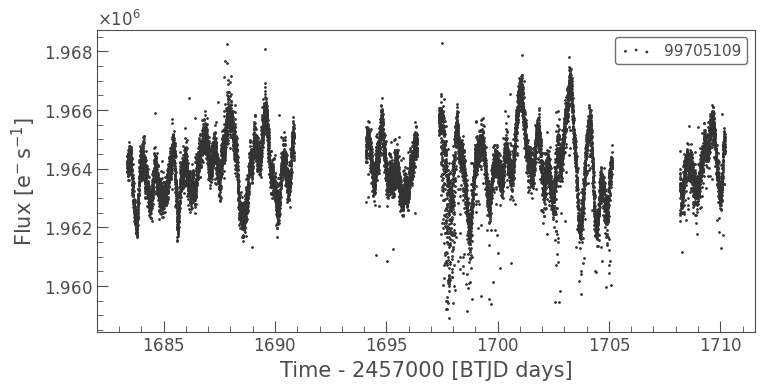

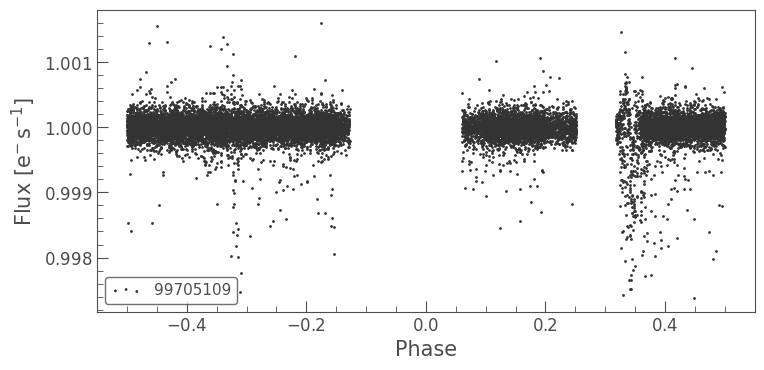

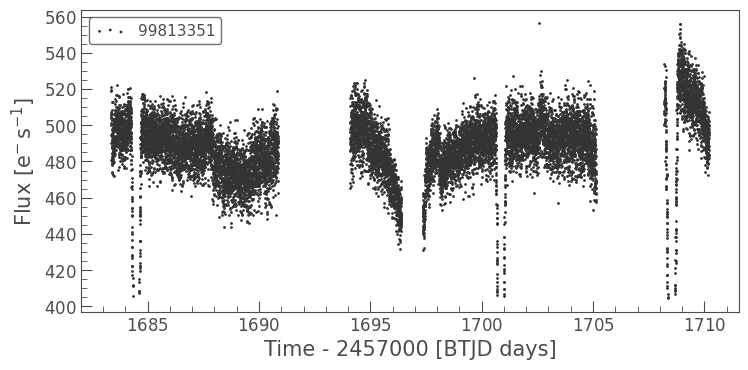

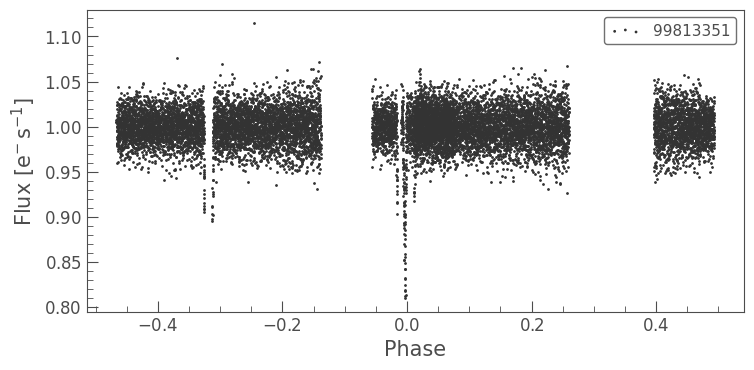

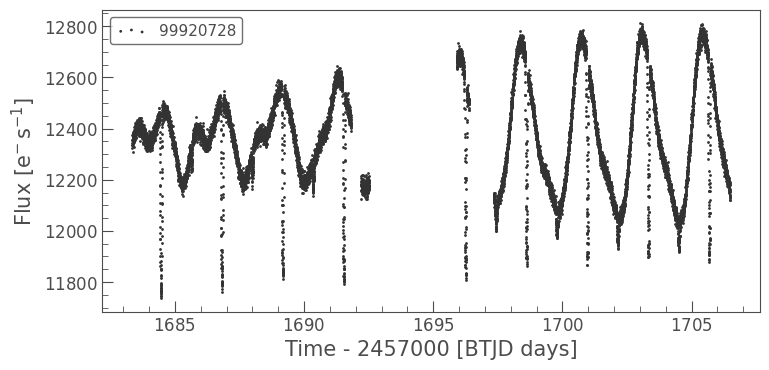

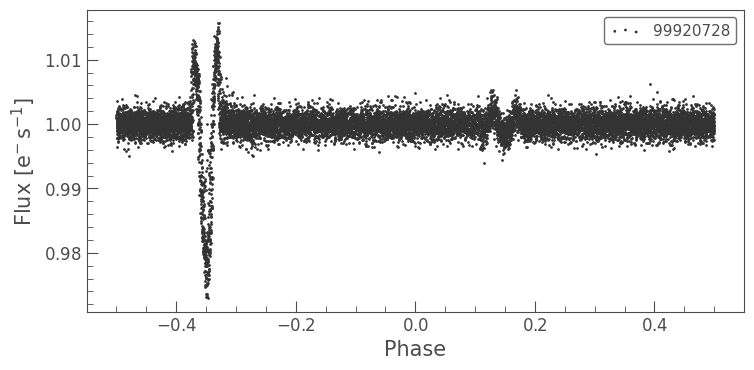

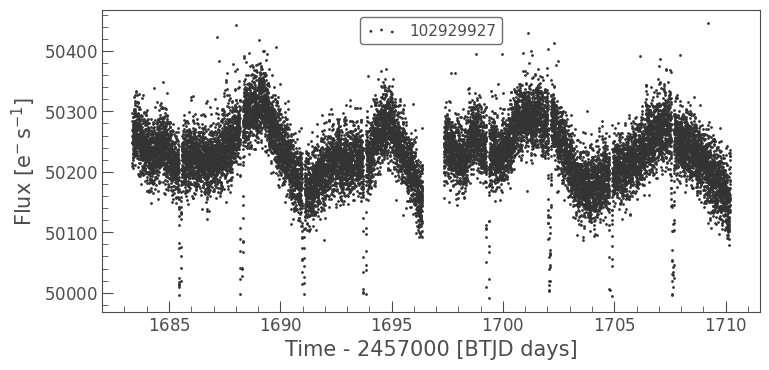

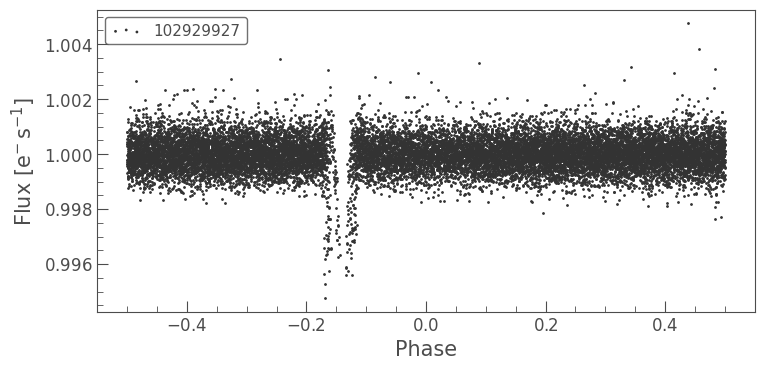

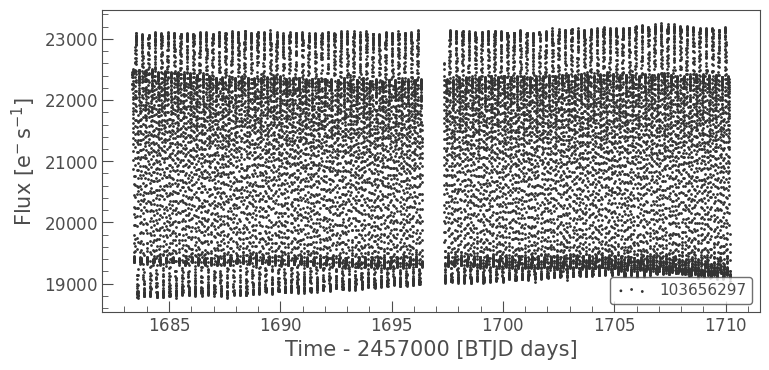

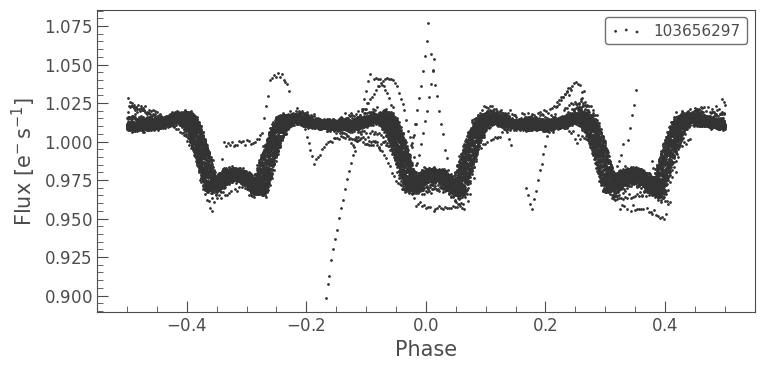

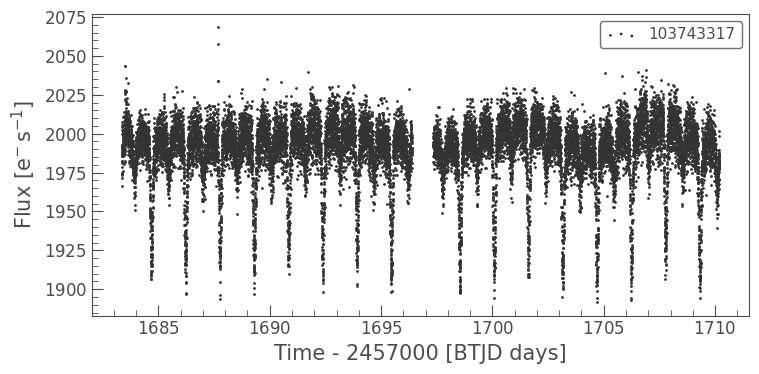

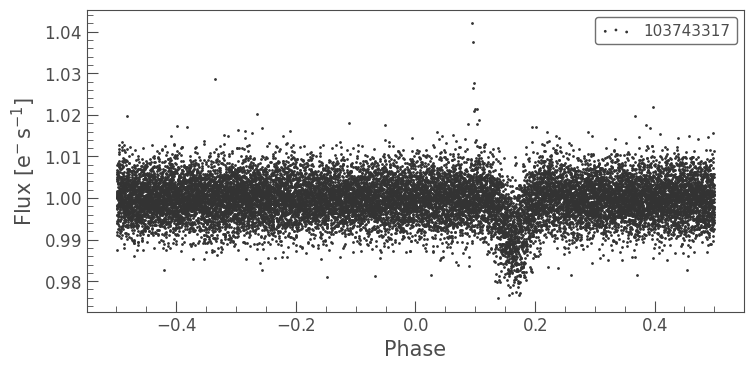

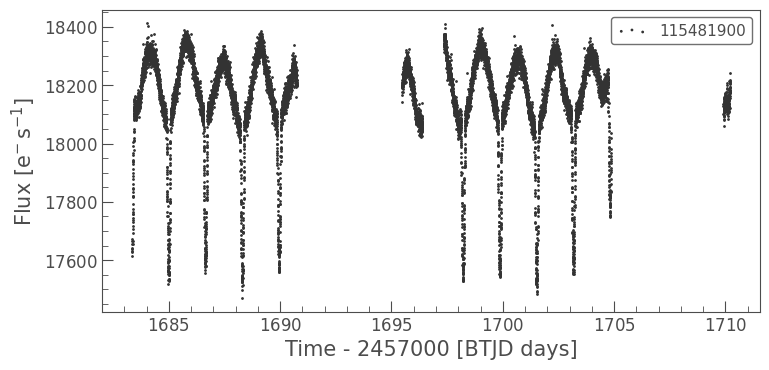

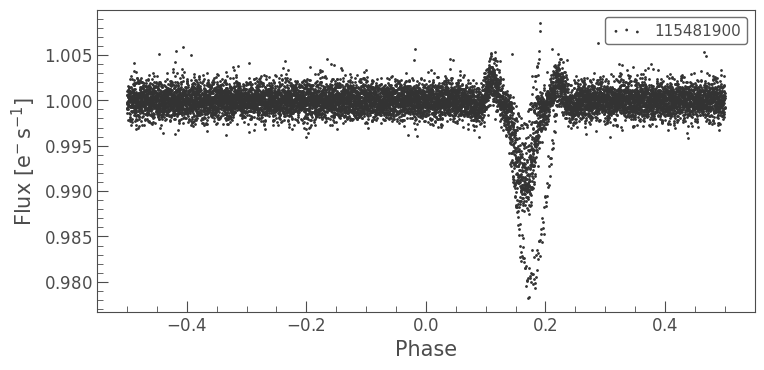

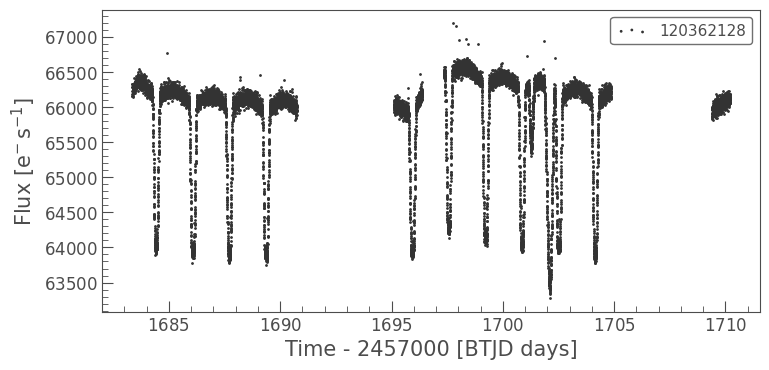

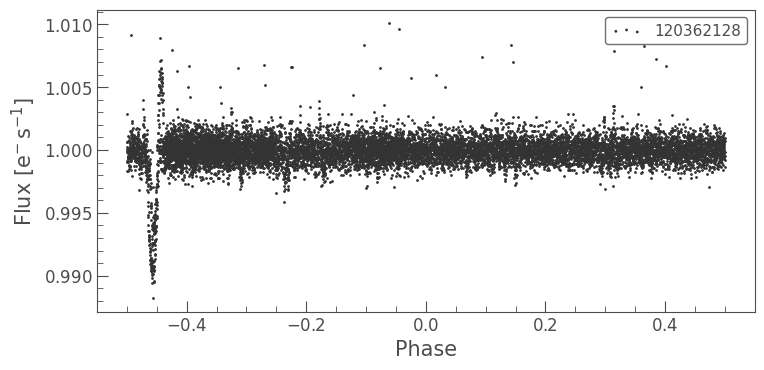

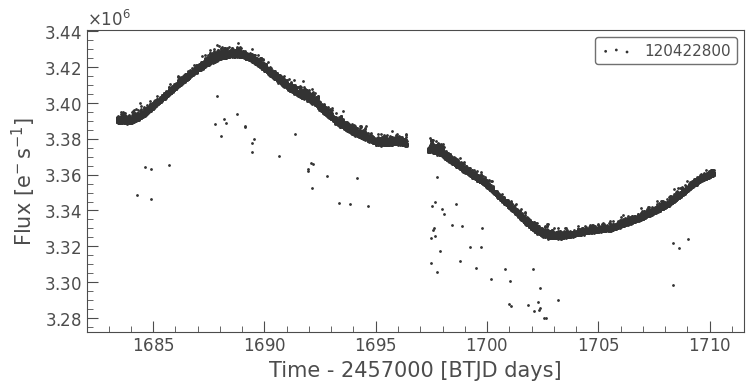

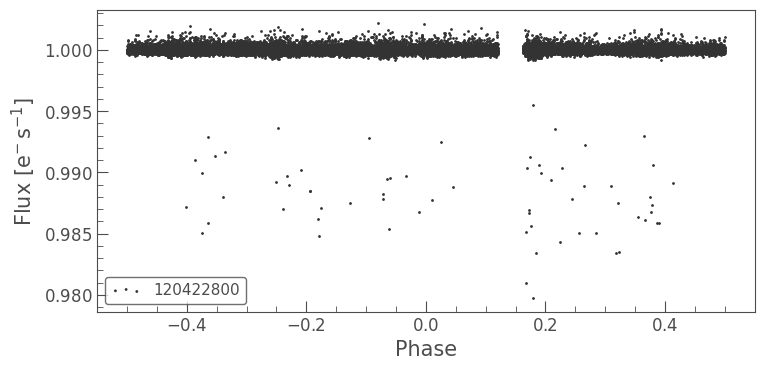

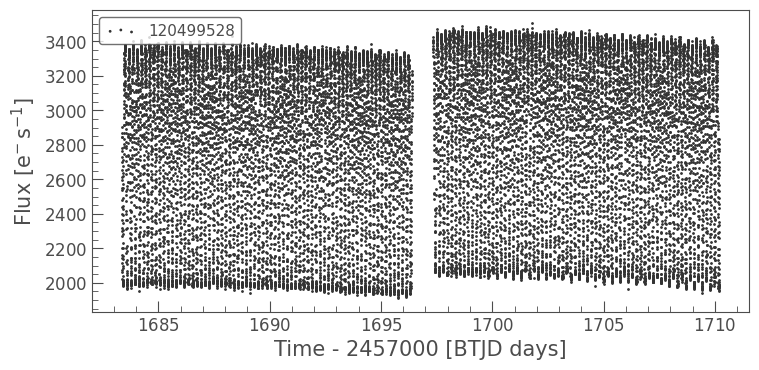

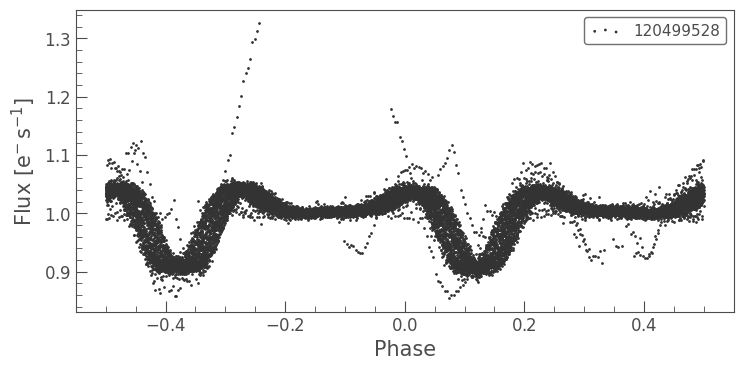

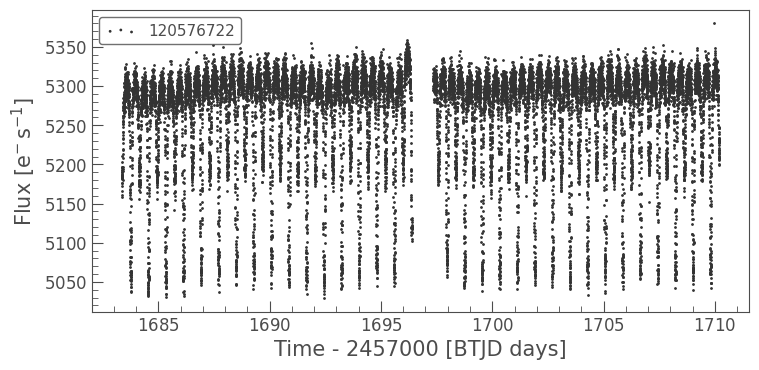

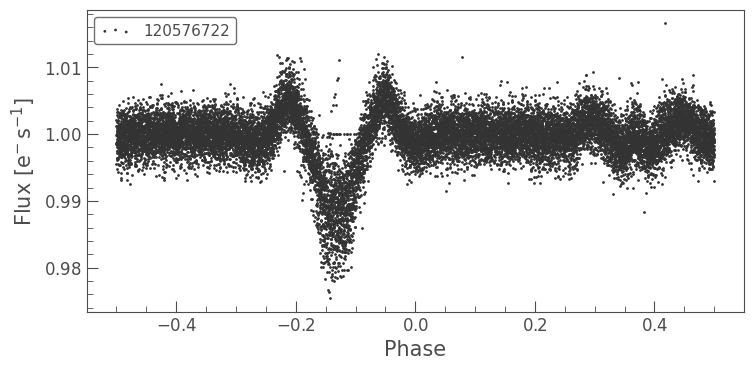

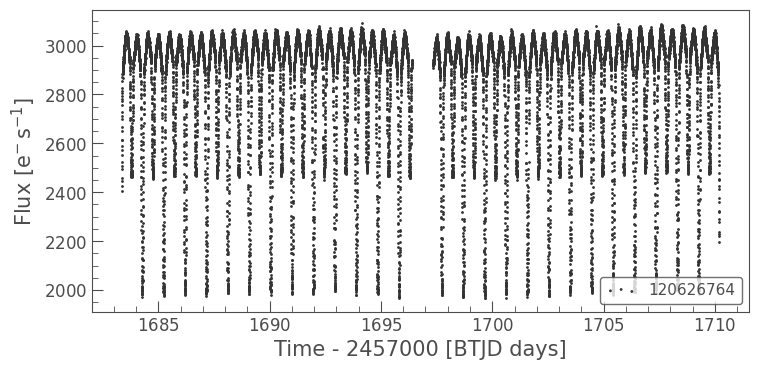

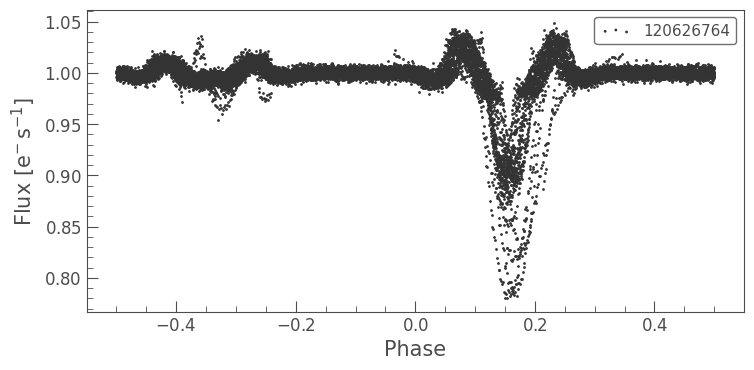

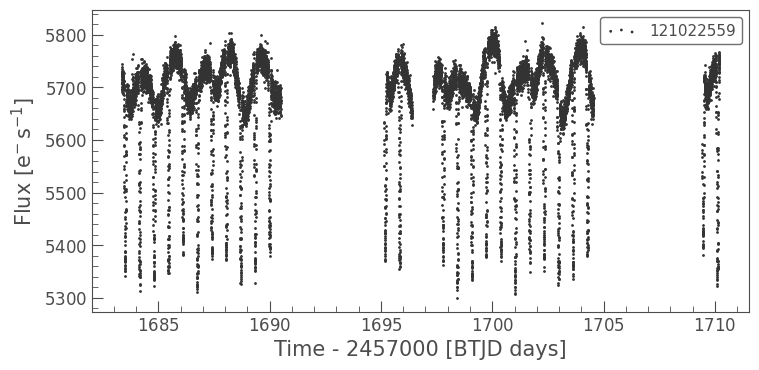

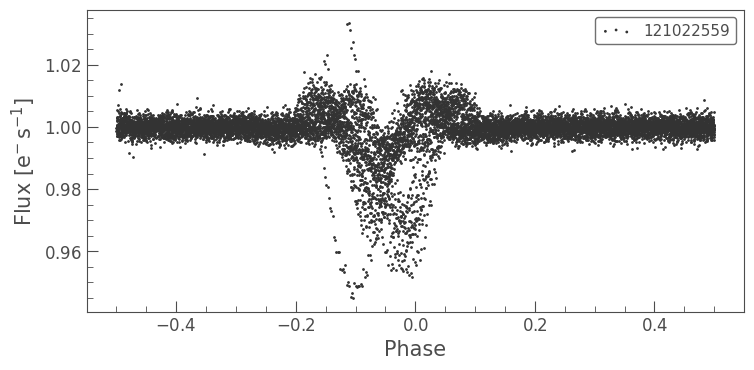

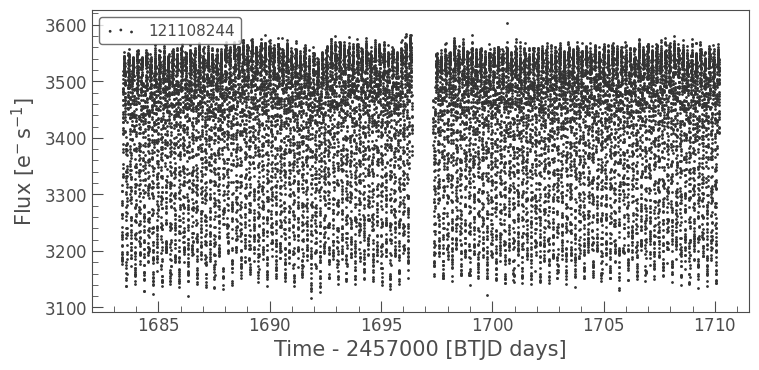

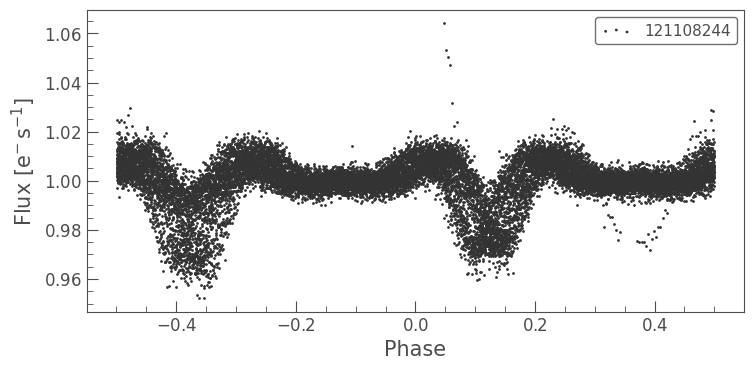

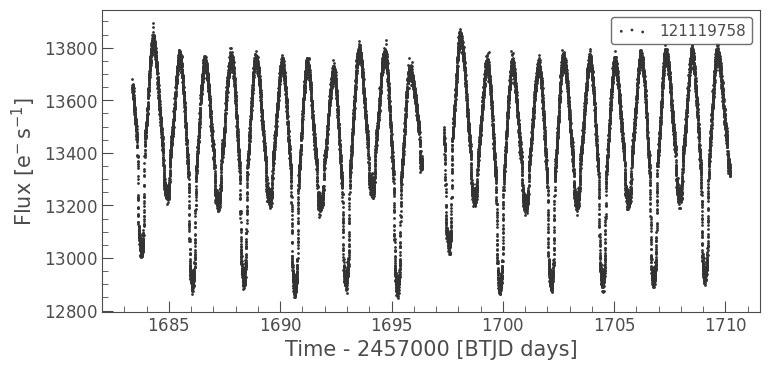

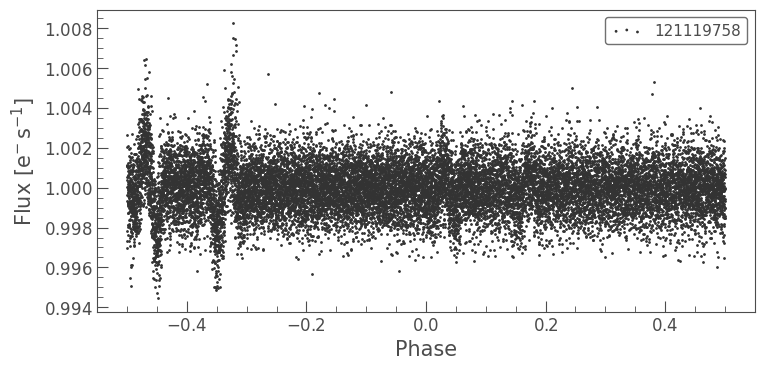

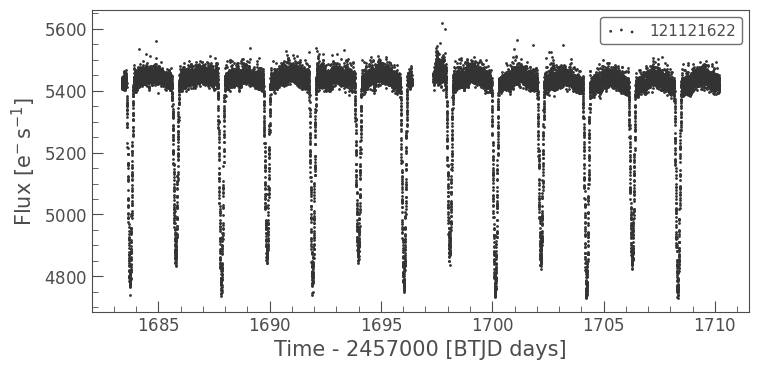

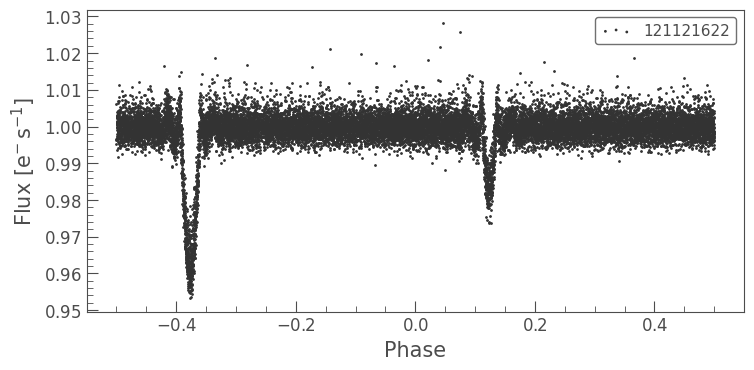

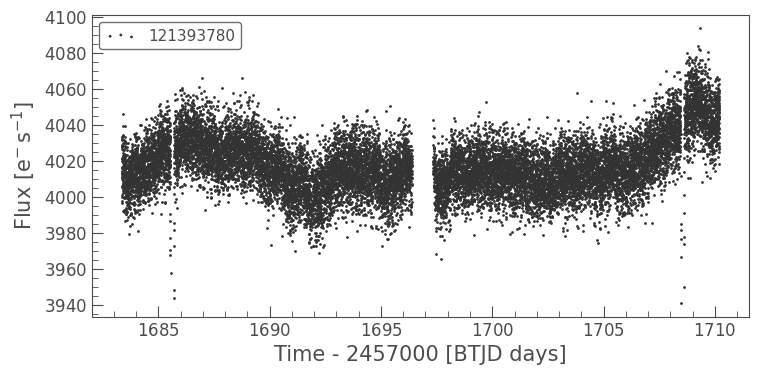

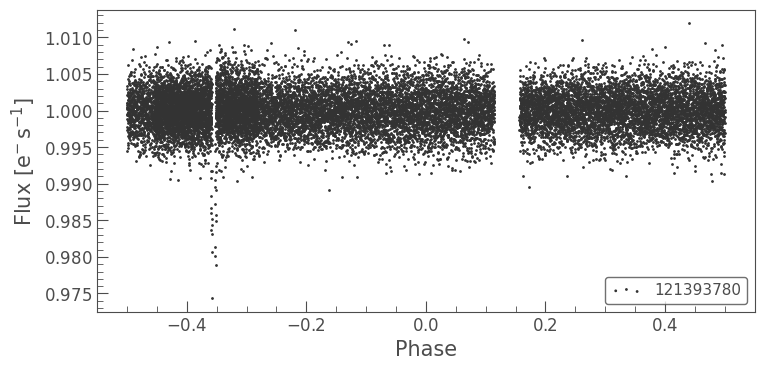

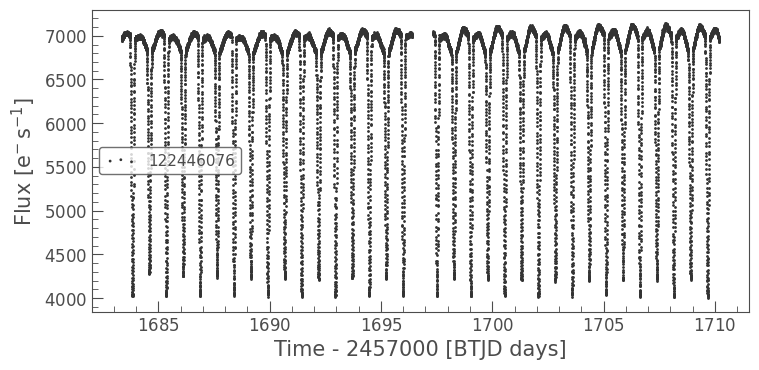

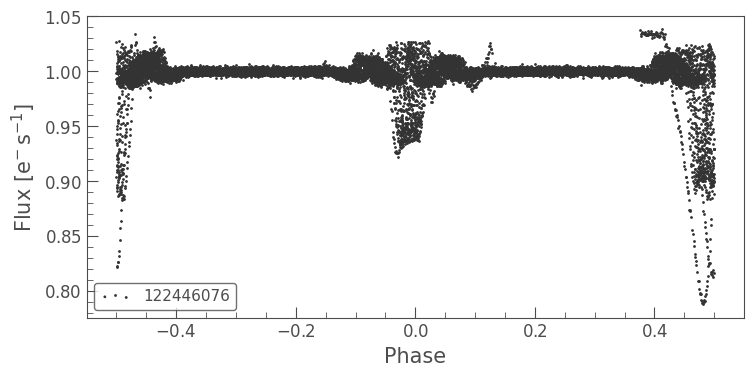

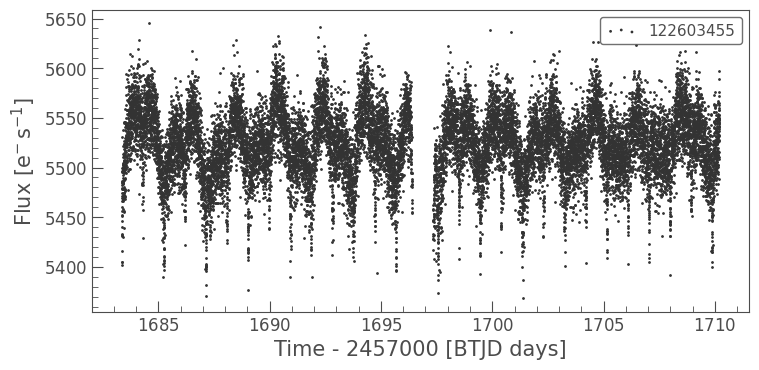

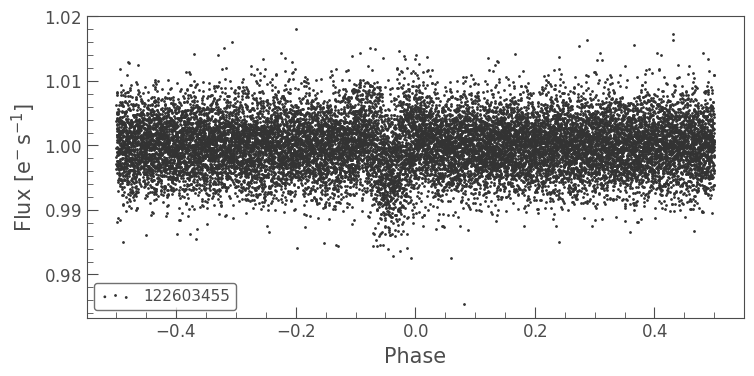

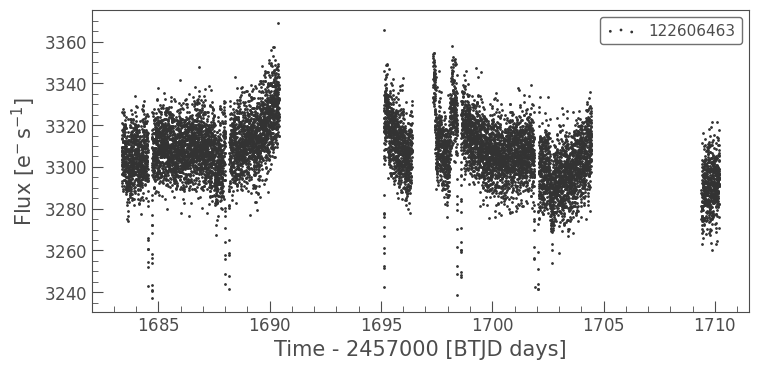

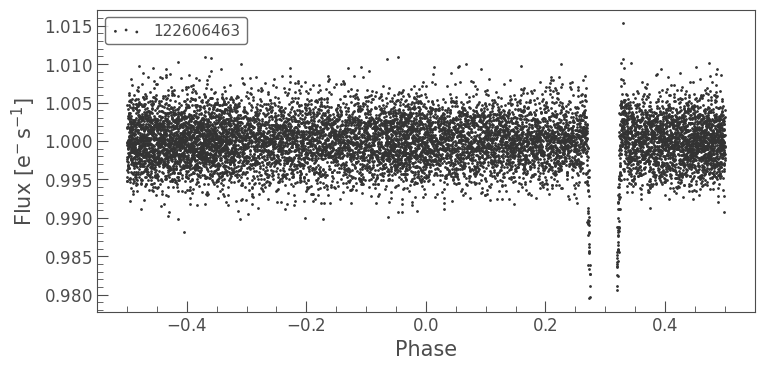

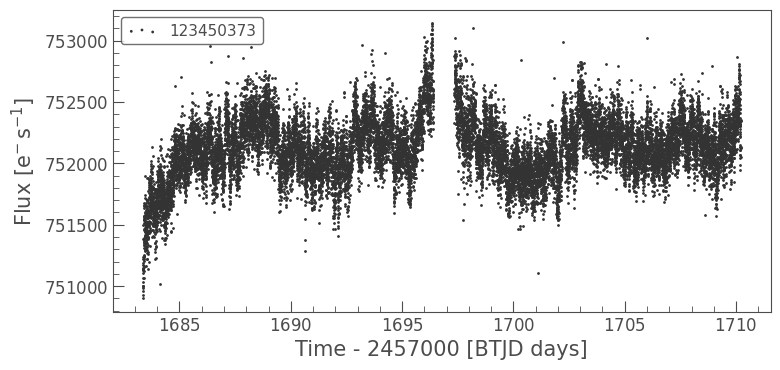

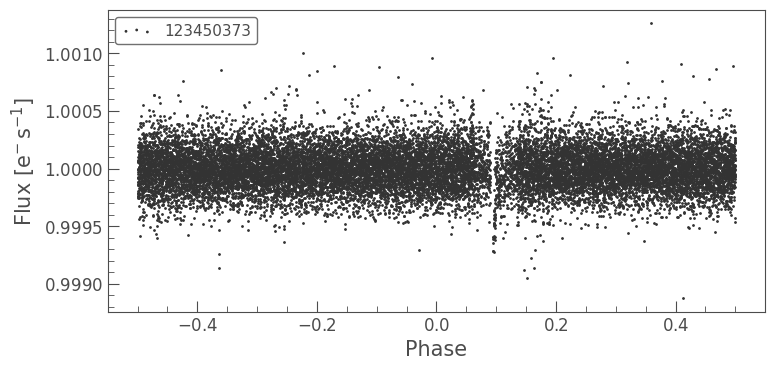

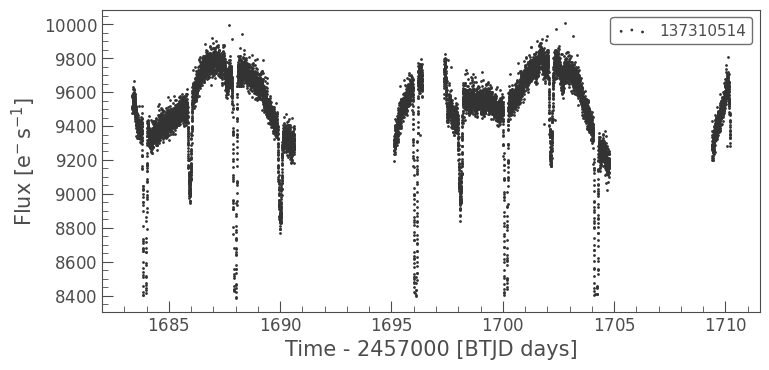

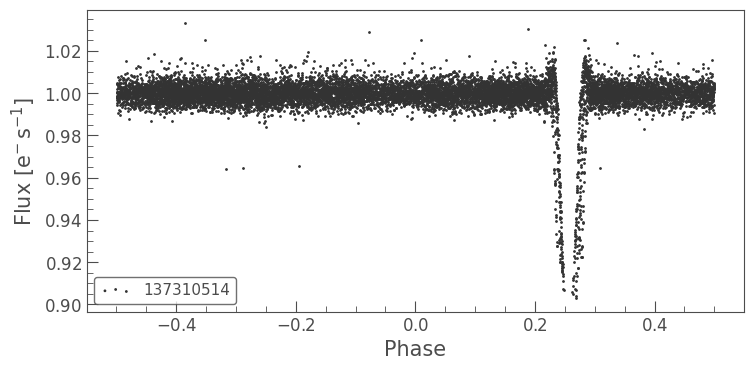

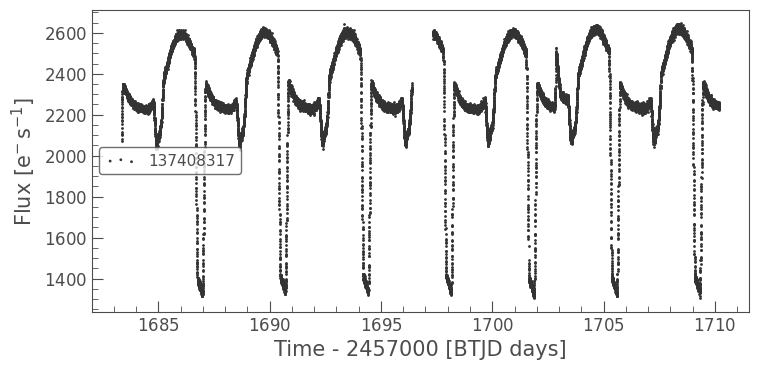

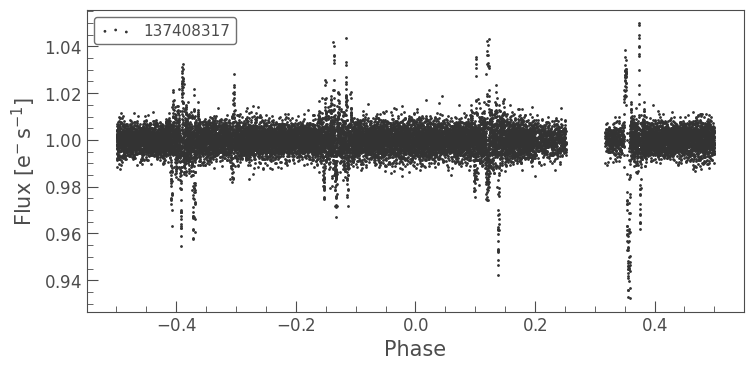

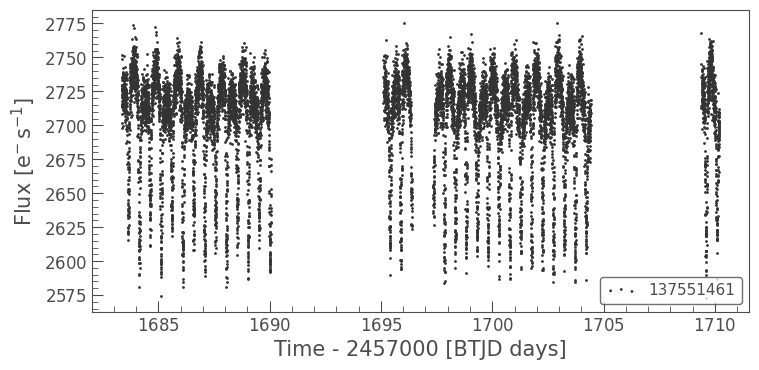

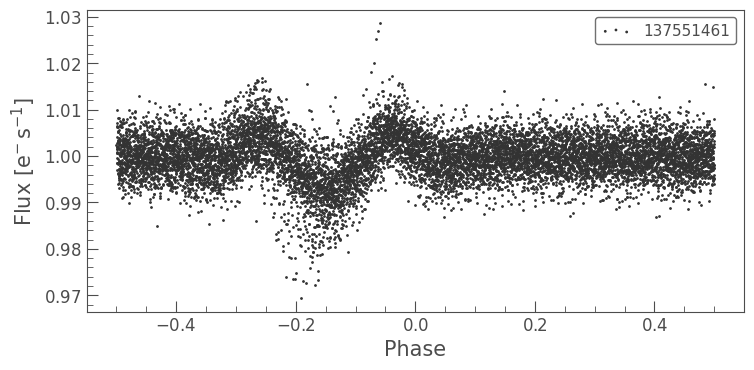

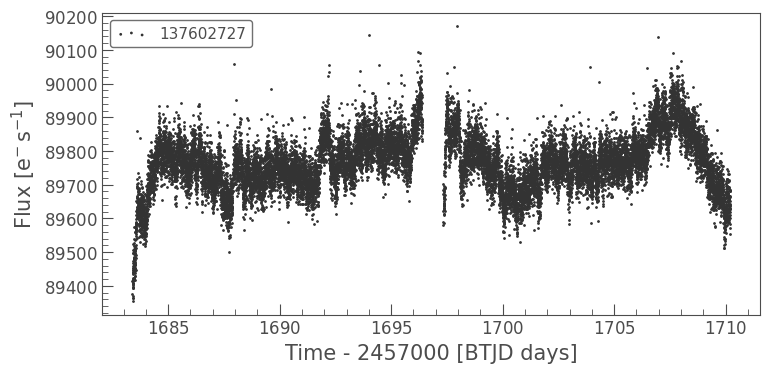

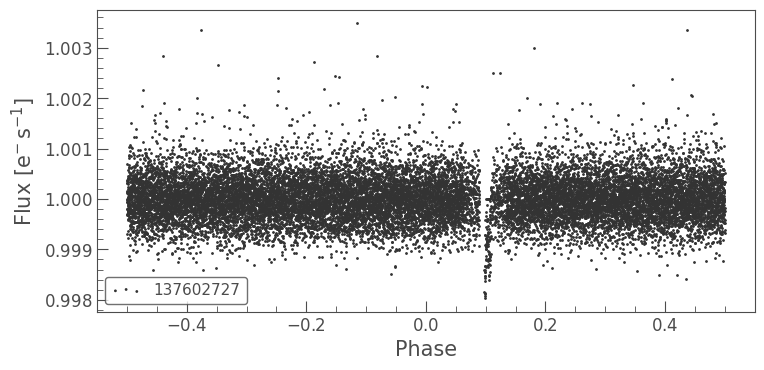

In [ ]:
# plot light curves using OpenAndPlot class
idx_1 = 20
idx_2 = 45
for i,j in zip(data_for_class[idx_1:idx_2],period_for_classmethod[idx_1:idx_2]):
  data_list = list(i)
  #initialize the class
  class_obj = op.OpenAndPlot(data_list)
  lca_class_obj = lca.LCAnalysis(data_list)
  #plot
  class_obj.plot_cleaned_lc()
  print(i, j)
  lca_class_obj.folded(j)

In [ ]:
dc= allstats_aftercut[["TIC","Sector"]]
dc

TIC  Sector
0         7582633      14
1         7582634      14
2         7583285      14
3         7584971      14
4         7585322      14
...           ...     ...
32030  2002418280      15
32031  2002418281      15
32032  2002486147      15
32033  2003139541      15
32034  2005005557      15

[31876 rows x 2 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97ae08f90>,
      dtype=object)

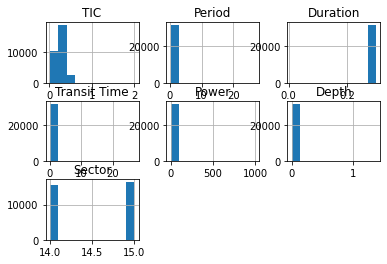

In [ ]:
allstats.hist()

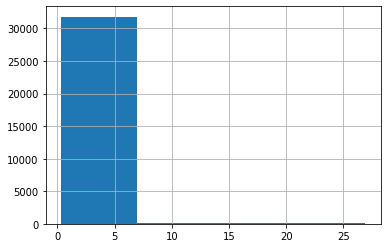

In [ ]:
allstats['Period'].hist(bins=4)

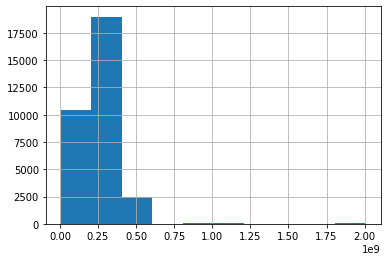

In [ ]:
allstats["TIC"].hist()

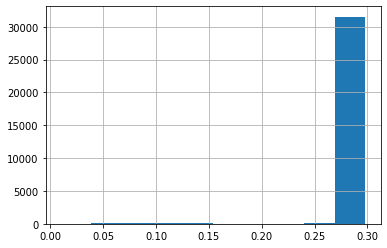

In [ ]:
allstats["Duration"].hist()

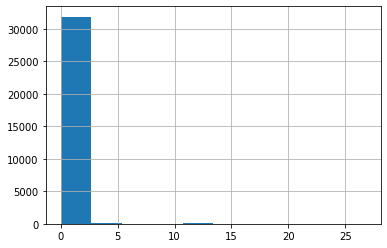

In [ ]:
allstats["Transit Time"].hist()

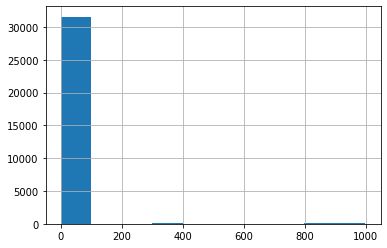

In [ ]:
allstats["Power"].hist()

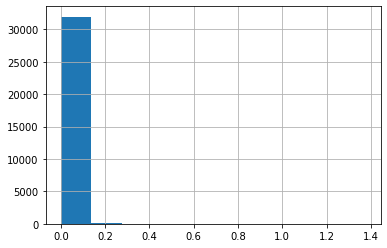

In [ ]:
allstats["Depth"].hist()

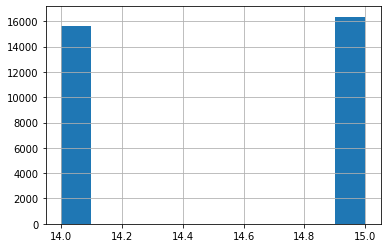

In [ ]:
allstats["Sector"].hist()

In [ ]:
min(allstats['Period'].to_numpy())

0.2999162518987651

In [ ]:
bins=np.logspace(np.log10(0.1),np.log10(1.0), 50)
bins

array([0.1       , 0.10481131, 0.10985411, 0.11513954, 0.12067926,
       0.12648552, 0.13257114, 0.13894955, 0.14563485, 0.1526418 ,
       0.15998587, 0.16768329, 0.17575106, 0.184207  , 0.19306977,
       0.20235896, 0.21209509, 0.22229965, 0.23299518, 0.24420531,
       0.25595479, 0.26826958, 0.28117687, 0.29470517, 0.30888436,
       0.32374575, 0.33932218, 0.35564803, 0.37275937, 0.39069399,
       0.40949151, 0.42919343, 0.44984327, 0.47148664, 0.49417134,
       0.51794747, 0.54286754, 0.5689866 , 0.59636233, 0.62505519,
       0.65512856, 0.68664885, 0.71968567, 0.75431201, 0.79060432,
       0.82864277, 0.86851137, 0.91029818, 0.95409548, 1.        ])

In [ ]:
min(allstats[col].to_numpy())
max(allstats[col].to_numpy())
bins=np.logspace(np.log10(min(allstats[col].to_numpy())),np.log10(max(allstats[col].to_numpy())), 50)

NameError: ignored

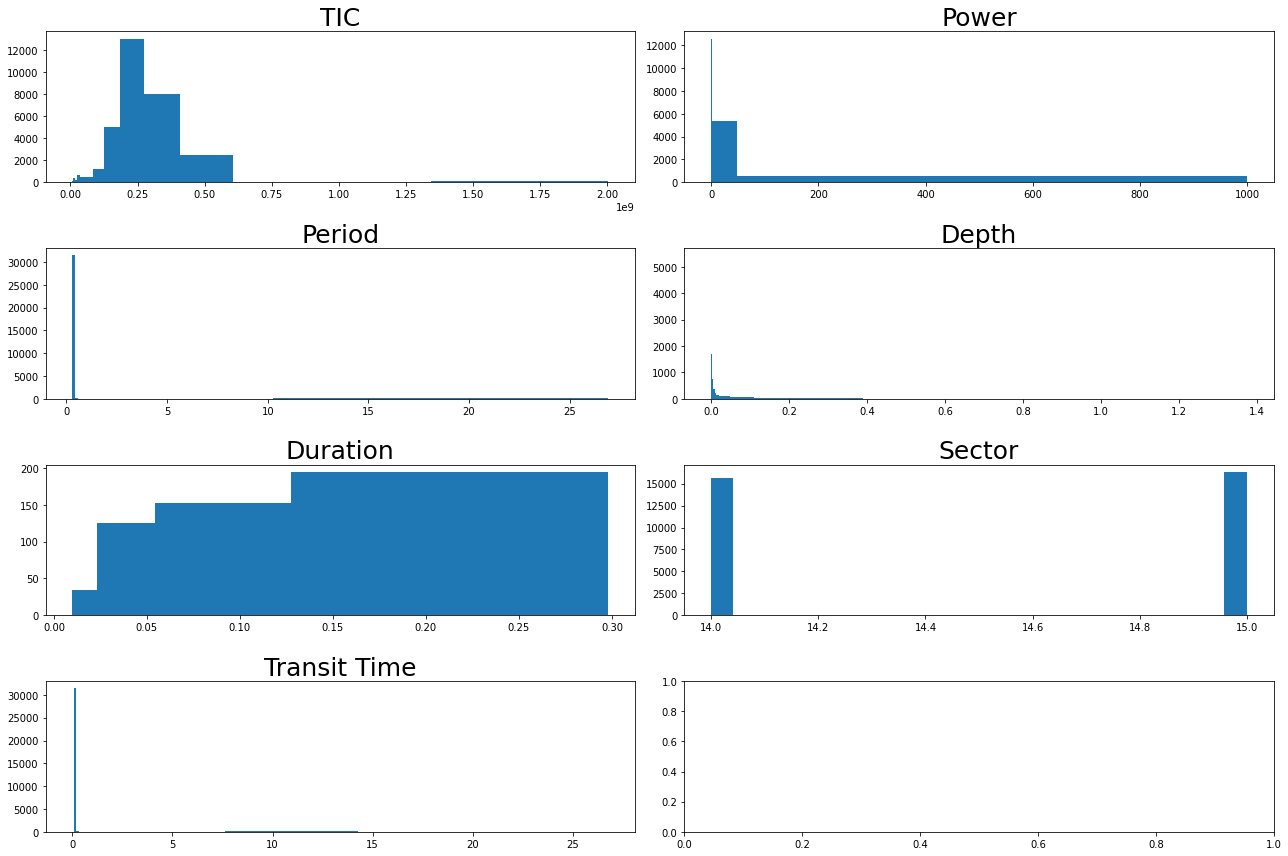

In [ ]:
fig,ax= plt.subplots(4,2,figsize=(18,12))

for i,col in enumerate(allstats.columns):
  N =[15,15,5,15,5,30,25,15]
  if min(allstats[col].to_numpy()) == 0:
    bins=np.logspace(np.log10(min(allstats[col].to_numpy())+0.005),np.log10(max(allstats[col].to_numpy())), N[i])
  else:
    bins=np.logspace(np.log10(min(allstats[col].to_numpy())),np.log10(max(allstats[col].to_numpy())), N[i])
  if i<4:
    ax[i,0].hist(allstats[col],bins) 
    ax[i,0].set_title(col,fontsize=25)
  else:
   ax[i-4,1].hist(allstats[col],bins)
   ax[i-4,1].set_title(col,fontsize=25)
   
  plt.tight_layout()